In [1]:
%load_ext autoreload
%autoreload

import pandas as pd
import numpy as np

pd.options.display.float_format = "{:.2f}".format
np.set_printoptions(precision=4)

import matplotlib.pyplot as plt
%matplotlib inline

### TRAIN
        the train set, containing the user ids and whether they have churned.
        Churn is defined as whether the user did not continue the subscription within 30 days of expiration. 
        is_churn = 1 means churn,
        is_churn = 0 means renewal.

In [2]:
train_input = pd.read_csv('/home/dissertation/data/train_v2.csv', 
                          dtype = {'msno' : 'category'})
train_input.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [57]:
test_input = pd.read_csv('/home/dissertation/data/sample_submission_v2.csv', 
                          dtype = {'msno' : 'category'})
test_input.head()

,msno,is_churn
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0


In [60]:
train_input.is_churn.value_counts()

0    883630
1     87330
Name: is_churn, dtype: int64

In [61]:
np.mean(train_input.is_churn)

0.08994191315811156

In [62]:
train_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
msno        970960 non-null category
is_churn    970960 non-null int64
dtypes: category(1), int64(1)
memory usage: 58.5 MB


 0    883630
1     87330
Name: is_churn, dtype: int64


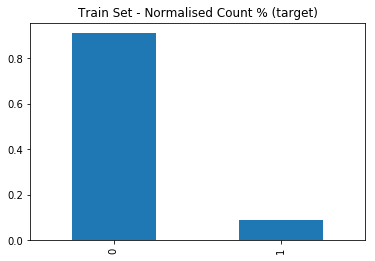

In [63]:
train_input.is_churn.value_counts(dropna=False, normalize=True).plot(kind='bar', title='Train Set - Normalised Count % (target)')
print("",train_input.is_churn.value_counts())

In [64]:
train_input.describe(include='all')

,msno,is_churn
count,970960,970960.00
unique,970960,nan
top,zzxi7n5xoTYo9Q3VTygLWvl/rBDcexwaeAry0yK7Q0E=,nan
freq,1,nan
mean,NaN,0.09
std,NaN,0.29
min,NaN,0.00
25%,NaN,0.00
50%,NaN,0.00
75%,NaN,0.00


So we have churn records for 970960 members

### MEMBERS

In [3]:
members_input = pd.read_csv('/home/dissertation/data/members_v3.csv',
                            dtype={'registered_via' : np.uint8,
                                   'gender' : str,
                                   'city' : 'category',
                                   'registered_via' : 'category'})

In [66]:
members_input['registration_init_time_dt'] = pd.to_datetime(members_input['registration_init_time'], 
                                                            format='%Y%m%d', errors='ignore')

In [4]:
members_input.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [5]:
members_input.describe(include='all')

,msno,city,bd,gender,registered_via,registration_init_time
count,6769473,6769473,6769473.00,2339968,6769473,6769473.00
unique,6769473,21,nan,2,18,nan
top,7syIvP985gRZq2RlbFnOSSie/rAF5FOMtr3eKuYFhJo=,1,nan,male,4,nan
freq,1,4804326,nan,1195355,2793213,nan
mean,NaN,NaN,9.80,NaN,NaN,20145175.91
std,NaN,NaN,17.93,NaN,NaN,23186.01
min,NaN,NaN,-7168.00,NaN,NaN,20040326.00
25%,NaN,NaN,0.00,NaN,NaN,20140422.00
50%,NaN,NaN,0.00,NaN,NaN,20151010.00
75%,NaN,NaN,21.00,NaN,NaN,20160604.00


#### BD: Age of member

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Age')
ax1.boxplot(members_input['bd'])

In [ ]:
upper_q = .99
lower_q = .01
upper_price_outlier = members_input['bd'].quantile(upper_q)
lower_price_outlier = members_input['bd'].quantile(lower_q)
print("Using {0} and {1} quantiles would suggest {2} and {3} as the upper and lower bounds of bd".format(upper_q, lower_q, upper_price_outlier, max(0, lower_price_outlier)))
print("This method would  exclude {0} instances".format(len(members_input[~members_input.bd.between(lower_price_outlier, upper_price_outlier)])))
print("Very inconsistent/noisy data in this feature. Needs to be processed somehow")

#### Categorical Features

In [ ]:
for idx, col in enumerate(['city','gender','registered_via']):
    plt.figure()
    members_input[col].value_counts(dropna=False, normalize=True).plot(kind='bar', title='Train Set - Normalized Count % ({0})'.format(col))

#### Notes:
    msno: 6769473 members in total in the system.
    city [1] is by far the most active city in terms of memberships (~ 70%)
    A large portion (>60%) of gender information is missing
    There are 4 main popular approaches to registering, [4, 3, 9, 7]. The rest are minimal

#### TRANSACTIONS

In [37]:
## Next load in the transactions data
transactions_input = pd.read_csv('/home/dissertation/data/transactions.csv',
                                 dtype = {'payment_method' : 'category',
                                          'payment_plan_days' : np.uint8,
                                          'plan_list_price' : np.uint8,
                                          'actual_amount_paid': np.uint8,
                                          'is_auto_renew' : np.bool,
                                          'is_cancel' : np.bool})
transactions_input.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,True,20150930,20151101,False
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,True,20150930,20151031,False
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,True,20150930,20160427,False
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,True,20150930,20151128,False
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,True,20150930,20151121,False


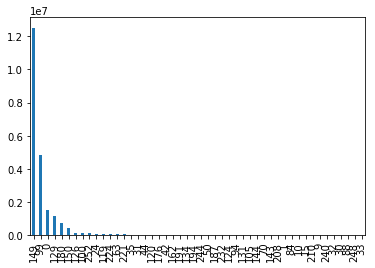

In [39]:
transactions_input.plan_list_price.value_counts().plot(kind='bar')

In [ ]:
transactions_input.describe(include='all')

In [ ]:
plt.hist(transactions_input.actual_amount_paid, bins=50)

In [ ]:
for idx, col in enumerate(['payment_method_id','payment_plan_days','is_auto_renew','is_cancel']):
    plt.figure()
    transactions_input[col].value_counts(dropna=False, normalize=True).plot(kind='bar', title='Train Set - Normalized Count % ({0})'.format(col))

#### Notes:
    payment_method_id 41 accounts for >50% of all payment types
    most transactions are for 30 day plans
    >85% of customers opt to auto_renew 
    >90% have not cancelled their subscription

### Merging train_input and members

In [6]:
merged_input = pd.merge(left=train_input, right=members_input, how='inner', on=['msno'])
merged_input.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5,28,male,3,20131223,2013-12-23
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,20,male,3,20131223,2013-12-23
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,18,male,3,20131227,2013-12-27
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1,0,NaN,7,20140109,2014-01-09
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,35,female,7,20140125,2014-01-25


In [ ]:
merged_input.describe(include='all')

In [ ]:
merged_input['gender'] = merged_input['gender'].astype(str)
pd.crosstab(merged_input['gender'].fillna('missing'), 
            merged_input['is_churn'].fillna('missing')).plot(kind='bar')
pd.crosstab(merged_input['gender'].fillna('missing'), 
            merged_input['is_churn'].fillna('missing'), normalize=True)

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Age')
ax1.boxplot(merged_input[merged_input.bd.between(0,100)]['bd'])

In [76]:
members_input.head()

,msno,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915,2011-09-15


In [79]:
transactions_summary.transaction_date_max.max()

Timestamp('2017-02-28 00:00:00')

### Merging Transactions with those members involved in the churn study

In [7]:
transactions_merged = pd.merge(left = merged_input[['msno']], 
                               right = transactions_input, 
                               how='left', 
                               on='msno')
transactions_merged.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,38.00,30.00,149.00,149.00,False,20170228.00,20170330.00,False
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31.00,0.00,0.00,149.00,True,20150331.00,20150430.00,False
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31.00,0.00,0.00,149.00,True,20150630.00,20150731.00,False
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31.00,30.00,149.00,149.00,True,20150902.00,20150901.00,True
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31.00,0.00,0.00,149.00,True,20150831.00,20150930.00,False


In [8]:
transactions_merged[transactions_merged.msno == 'ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=']

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,38.00,30.00,149.00,149.00,False,20170228.00,20170330.00,False
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31.00,0.00,0.00,149.00,True,20150331.00,20150430.00,False
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31.00,0.00,0.00,149.00,True,20150630.00,20150731.00,False
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31.00,30.00,149.00,149.00,True,20150902.00,20150901.00,True
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31.00,0.00,0.00,149.00,True,20150831.00,20150930.00,False
5,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31.00,0.00,0.00,149.00,True,20150731.00,20150831.00,False


In [9]:
%%time
#[transactions_merged.msno == 'ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=']\

transactions_merged[transactions_merged.msno == 'ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=']\
        .groupby('msno')\
        .agg({'msno' : {'total_order' : 'count'},
                        'payment_method_id' : {'payment_method_id_mode' : lambda x: x.mode()[0],
                                               'payment_method_id_count' : lambda x: len(np.unique(x))},
                        'payment_plan_days' : {'payment_plan_days_mode' : lambda x: x[x>0].mode()[0],
                                               'payment_plan_days_mean' : 'mean'},
                        'plan_list_price' : {'plan_list_price_mean' : 'mean',
                                             'plan_lifetime_value' : 'sum'},
                        'actual_amount_paid' : {'actual_amount_mean' : 'mean',
                                                'total_actual_amount' : 'sum'},
                        'is_auto_renew' : {'is_auto_renew_mode' : lambda x : x.mode()[0]},
                        'transaction_date' : {'transaction_date_min' : lambda x: x.min(),
                                              'transaction_date_max' : lambda x: x.max()},
                        'is_cancel' : {'cancel_times' : lambda x : sum(x==1)}
            })

CPU times: user 627 ms, sys: 269 µs, total: 628 ms
Wall time: 625 ms


/home/anaconda/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


msno  \
                                             total_order   
msno                                                       
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=           6   

                                                  payment_method_id  \
                                             payment_method_id_mode   
msno                                                                  
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                  31.00   

                                                                      \
                                             payment_method_id_count   
msno                                                                   
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                    2.00   

                                                  payment_plan_days  \
                                             payment_plan_days_mode   
msno                                                                  
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                  30.00   

                                                                     \
                                             payment_plan_days_mean   
msno                                                                  
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                  10.00   

                                                  plan_list_price  \
                                             plan_list_price_mean   
msno                                                                
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=                49.67   

                                                                  \
                                             plan_lifetime_value   
msno                                                               
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=              298.00   

                                             actual_amount_paid  \
                                             actual_amount_mean   
msno                                                              
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=             149.00   

                                                                  \
                                             total_actual_amount   
msno                                                               
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=              894.00   

                                                  is_auto_renew  \
                                             is_auto_renew_mode   
msno                                                              
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=               True   

                                                 transaction_date  \
                                             transaction_date_min   
msno                                                                
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=          20150331.00   

                                                                     is_cancel  
                                             transaction_date_max cancel_times  
msno                                                                            
ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=          20170228.00            1

In [17]:
transactions_summary = \
    transactions_merged\
            .groupby('msno')\
            .agg({'msno' : {'total_order' : 'count'},
                            'payment_method_id' : {'payment_method_id_mode' : lambda x: x.mode()[0] if len(x) > 1 else x,
                                                   'payment_method_id_count' : lambda x: len(np.unique(x))},
                            'payment_plan_days' : {'payment_plan_days_mode' : lambda x: x.mode()[0] if len(x) > 1 else x
                                                   ,
                                                   'payment_plan_days_mean' : 'mean'},
                            'plan_list_price' : {'plan_list_price_mean' : 'mean',
                                                 'plan_lifetime_value' : 'sum'},
                            'actual_amount_paid' : {'actual_amount_mean' : 'mean',
                                                    'total_actual_amount' : 'sum'},
                            'is_auto_renew' : {'is_auto_renew_mode' : lambda x : x.mode()[0] if len(x) > 1 else x},
                            'transaction_date' : {'transaction_date_min' : lambda x: x.min(),
                                                  'transaction_date_max' : lambda x: x.max()},
                            'is_cancel' : {'cancel_times' : lambda x : sum(x==1)}
                })
        
transactions_summary.columns = transactions_summary.columns.droplevel(0)
transactions_summary.reset_index(inplace=True)

In [19]:
transactions_summary.head()

,msno,total_order,payment_method_id_mode,payment_method_id_count,payment_plan_days_mode,payment_plan_days_mean,plan_list_price_mean,plan_lifetime_value,actual_amount_mean,total_actual_amount,is_auto_renew_mode,transaction_date_min,transaction_date_max,cancel_times
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,4,41.00,1.00,30.00,30.00,99.00,396.00,99.00,396.00,True,20161116.00,20170215.00,0
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,19,39.00,1.00,30.00,28.58,141.16,2682.00,149.00,2831.00,True,20150131.00,20170131.00,0
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,26,41.00,1.00,30.00,28.85,143.27,3725.00,149.00,3874.00,True,20150126.00,20170226.00,0
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,12,41.00,1.00,30.00,30.00,149.00,1788.00,149.00,1788.00,True,20160315.00,20170215.00,0
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,19,39.00,1.00,30.00,28.58,141.16,2682.00,149.00,2831.00,True,20150131.00,20170131.00,0


In [21]:
len(transactions_summary)

860967

In [22]:
transactions_summary.to_hdf('/home/dissertation/data/transactions_summary.h5', key='transactions_summary', mode='w')

/home/anaconda/lib/python3.7/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['msno', 'is_auto_renew_mode']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
